Examining Results
=================
* [Importing Results](#importing-results)
* [Plot by date](#plot-by-date)


## Importing the results

In [39]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [40]:
# Import the results
results = pd.read_csv('results_test.csv')
results = results.rename(columns={
    "Precipitation (kg/m^2/s)": "Precip",
    "Temperature (K)": "Temp",
    "Predictions": "Pred"
})

# Convert the date from ordinal to datetime
results['Date'] = results['Date'].apply(lambda x: datetime.datetime.fromordinal(x))

# Set index to date
results = results.set_index('Date')

results.head()

,Lat,Long,Alt,Precip,Temp,Pred,Actual
Date,,,,,,,
2003-12-02,47.98,55.82,190.0,0.0,271.142517,-15.160509,-16.59
2003-12-02,49.38,82.12,245.0,0.0,265.255096,-19.999182,-20.07
2003-12-02,46.29,64.15,45.0,0.0,270.236603,-16.032950,-8.42
2003-12-02,45.32,75.67,114.0,0.0,269.147888,-16.798422,-13.85
2003-12-02,48.78,123.13,178.0,0.0,252.437027,-12.316704,-12.78


In [41]:
# Extract the station locations from the original data
isoData = pd.read_csv("Isoscape_Data.csv")
stations = isoData[['Station', 'Lat', 'Long']].drop_duplicates()
stationList = stations['Station'].tolist()
stations.set_index('Station', inplace=True)

In [42]:
# Separating the results by station into a dictionary
results_station = {}
for stat in stationList:
    results_station[stat] = results[results['Lat'] == stations.loc[stat, 'Lat']]

## Plot by date

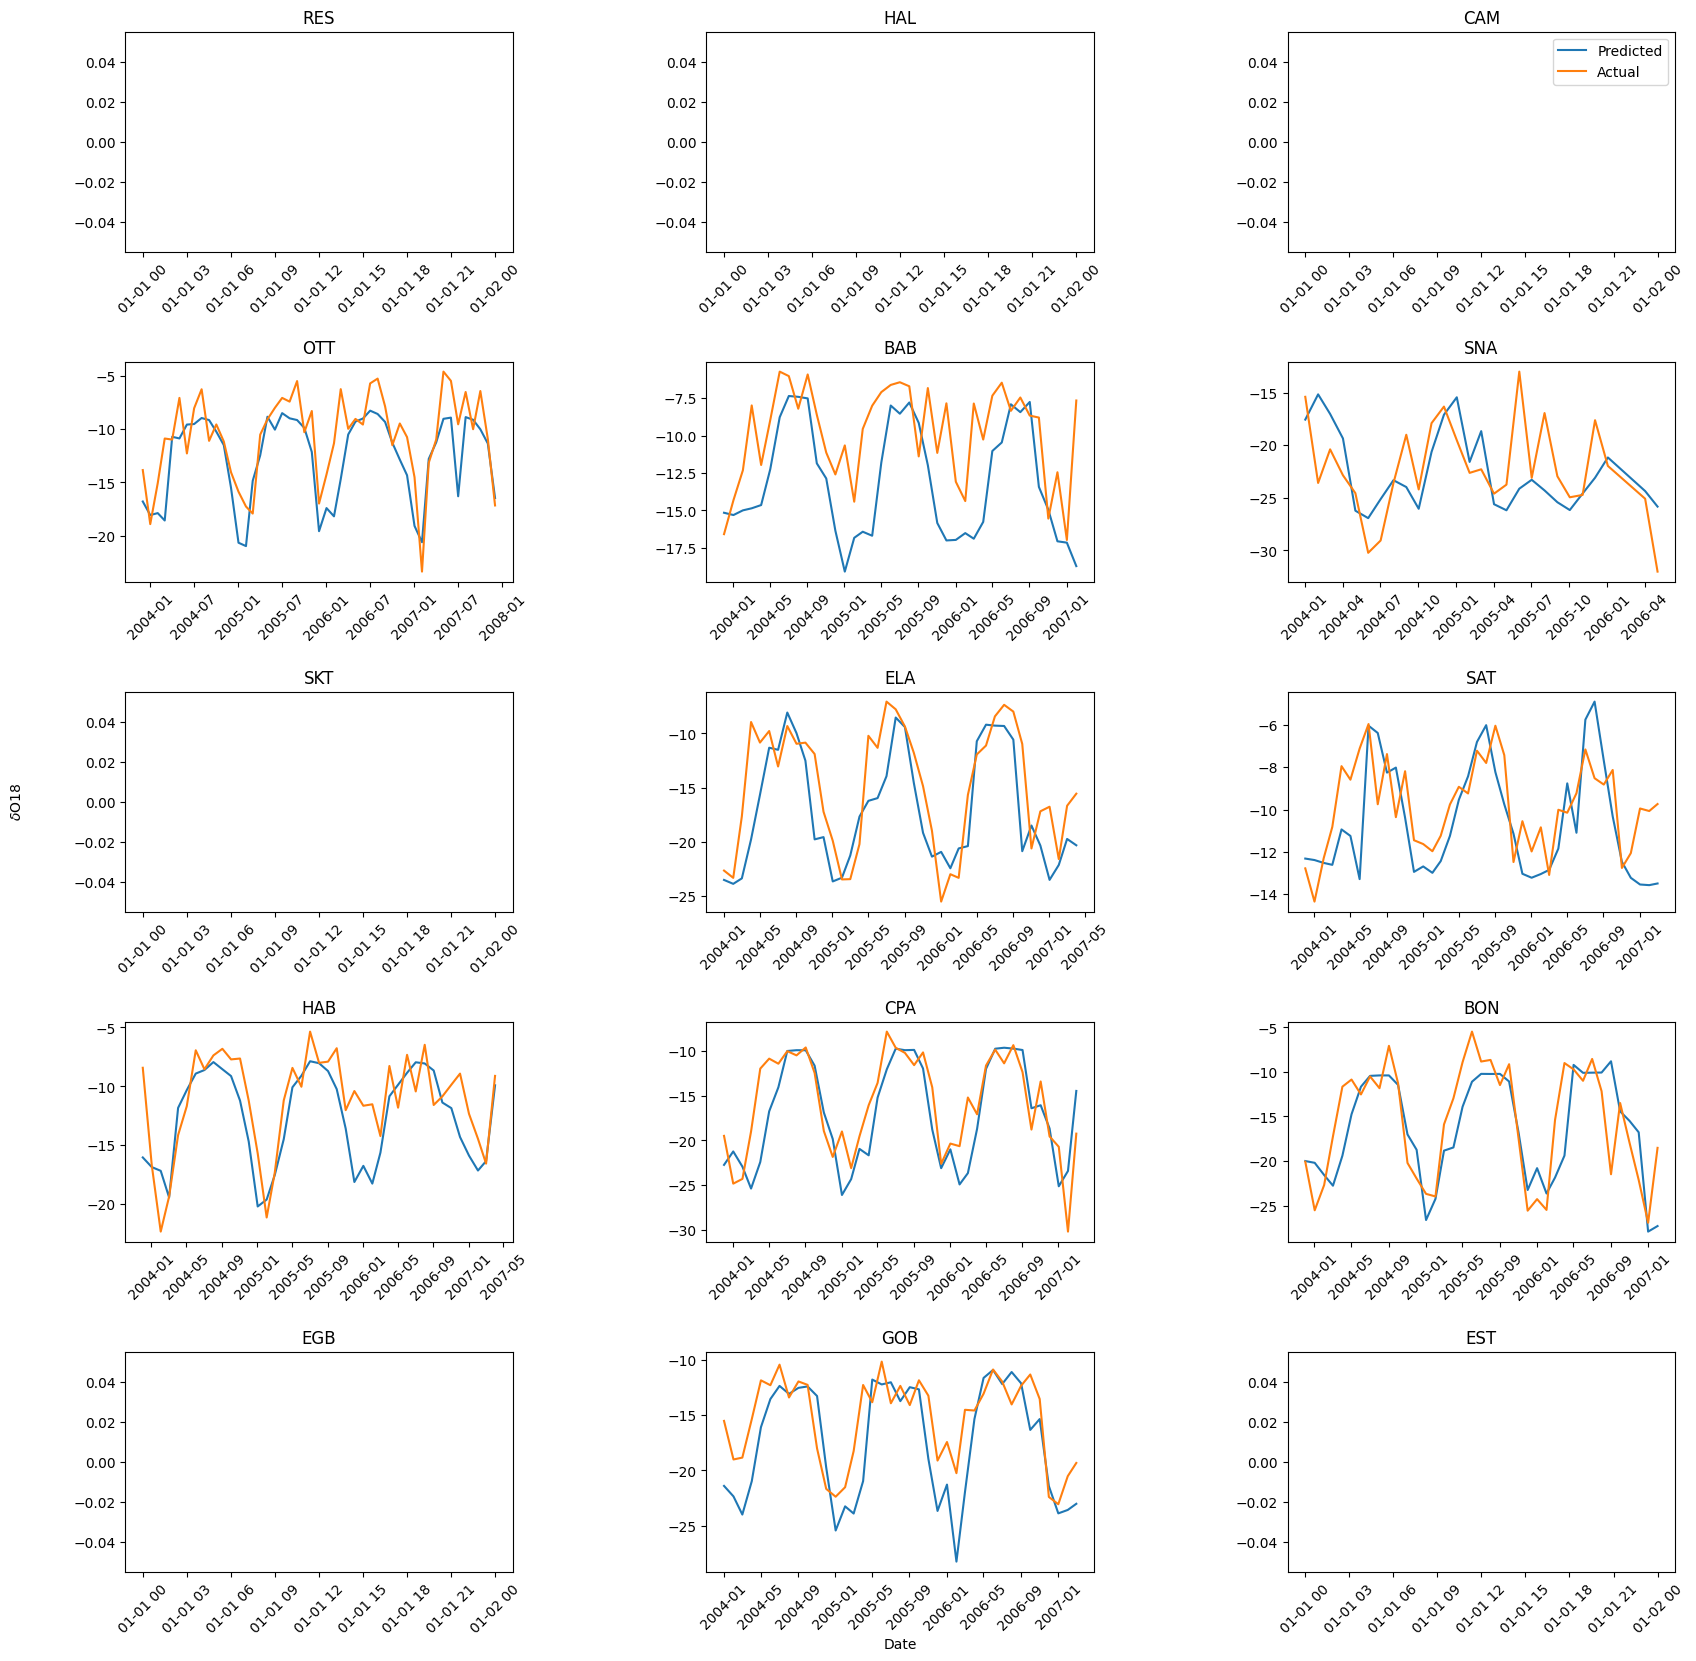

In [43]:
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

for stat in stationList:
    data = results_station[stat]
    ax = axes.flat[stationList.index(stat)]
    ax.plot(data.index, data['Pred'], label='Predicted')
    ax.plot(data.index, data['Actual'], label='Actual')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(stat)


plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Create a big subplot covering all the smaller ones and set its x-axis label
big_ax = figure.add_subplot(111, frameon=False)
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.set_xlabel('Date', labelpad=30) 
big_ax.set_ylabel(r'$\delta$O18', labelpad=50)  

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
big_ax.legend(handles, labels, loc='upper right')

plt.show()
plt.close()

## Plotting Predictions vs. Actuals

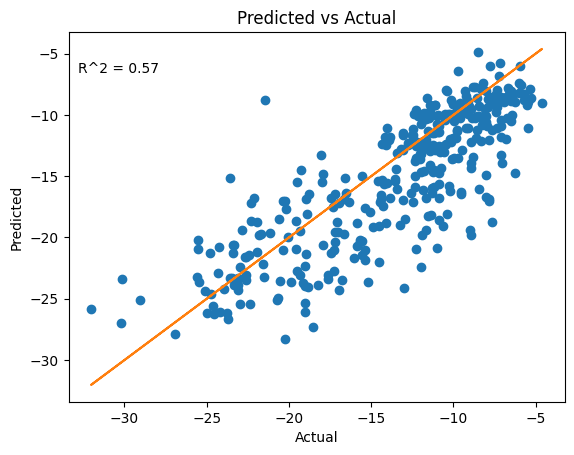

In [46]:
# Calculating the R^2 value
from sklearn.metrics import r2_score
coeff = r2_score(results['Actual'], results['Pred'])

# Plotting the results
plt.plot(results['Actual'], results['Pred'], 'o')
plt.plot(results['Actual'], results['Actual'])

# Placing the R^2 value in the plot
plt.text(0.1, 0.9, 'R^2 = ' + str(round(coeff, 2)), ha='center', va='center', transform=plt.gca().transAxes)

# Labeling the axes
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.close()